# Unit 6 clustering activity - weather dataset

Task:  
"Perform K-Means clustering on the dataset, weatherAUS.csv (from the Kaggle site). The details about this data can be found here. Again, you will have to remove a few columns from this data and make it useful for clustering. Play with a range of values of K, from, K=2 to K=6 and try to visualise the results of clustering using two-dimensional scatter plots."

In [23]:
# initial setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


import sklearn
import random 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler



In [6]:
# import datasets

data=pd.read_csv("Datasets\\weatherAUS.csv")

In [7]:
# general exploration

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [12]:
len(data.Location.value_counts())

data.Location.value_counts()


Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

49 distinct locations

In [14]:
# standardisation

## transform dataframe into array
array_clustering = data.drop(['Location','Date','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=1).values
array_clustering = np.nan_to_num(array_clustering)
array_clustering

## apply standardisation
array_clustering_standard = StandardScaler().fit_transform(array_clustering)
array_clustering_standard

array([[ 0.19690834, -0.03810929, -0.20492006, ...,  0.00309923,
         0.07059605, -0.27844993],
       [-0.73469264,  0.26766956, -0.27612488, ...,  0.04847488,
         0.40452007, -0.27844993],
       [ 0.11927493,  0.35106379, -0.27612488, ...,  0.62323311,
         0.2575935 , -0.27844993],
       ...,
       [-1.3247066 ,  0.29546763, -0.27612488, ..., -0.90441377,
         0.43123399, -0.27844993],
       [-1.04522631,  0.51785224, -0.27612488, ..., -0.66241031,
         0.64494537, -0.27844993],
       [-0.67258591,  0.53175128, -0.27612488, ..., -0.26915467,
         0.63158841, -0.27844993]])

In [16]:
# try different k values

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(array_clustering_standard)
    sse.append(kmeans.inertia_)

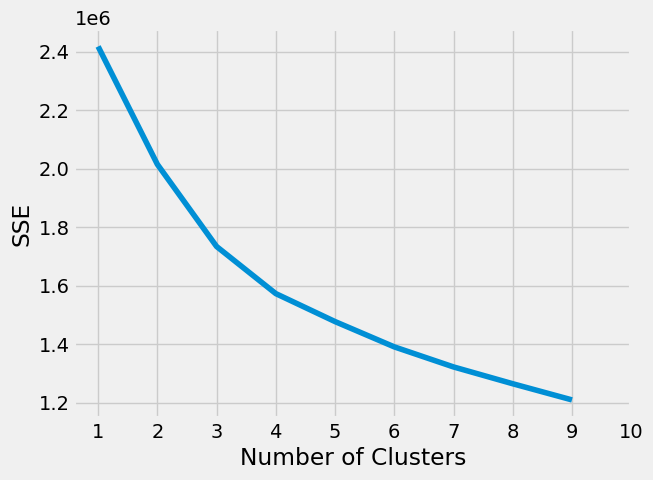

In [17]:
# visualising performance (elbow method)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Optimal k somewhere between 3/4, let's choose 4

In [18]:
# apply clustering
k = 4
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(array_clustering_standard)
labels = k_means.labels_
print(labels)

[3 3 0 ... 3 3 3]


In [19]:
# bring cluster labels to dataset

data["cluster"] = labels
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,cluster
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,3
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,3
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,3
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,1


In [20]:
# assign cluster as factor

data.cluster=data['cluster'].astype(object)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

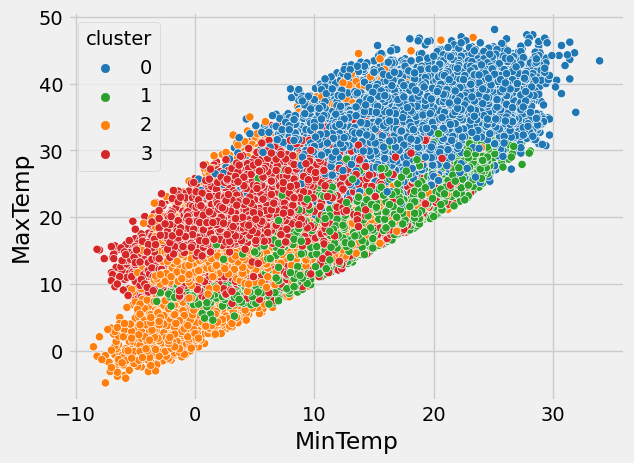

In [25]:
# Cluster visualisation

sns.scatterplot(data, x='MinTemp',y='MaxTemp', hue='cluster',
                palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])


<Axes: xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

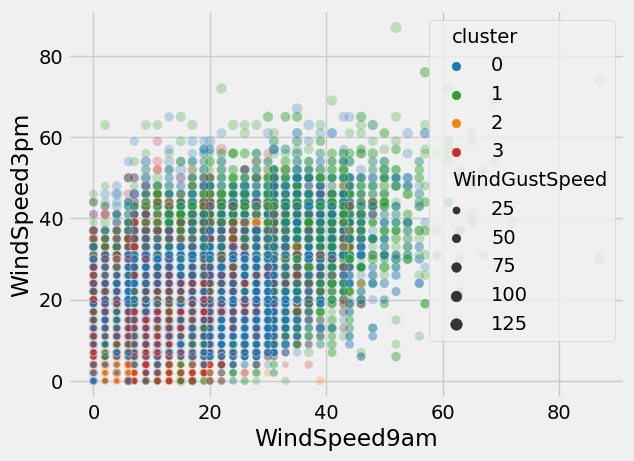

In [ ]:
# Cluster visualisation

sns.scatterplot(data, 
                x='WindSpeed9am',
                y='WindSpeed3pm', 
                size='WindGustSpeed',
                hue='cluster',
                alpha=0.25,
                palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])


<Axes: xlabel='Rainfall', ylabel='Sunshine'>

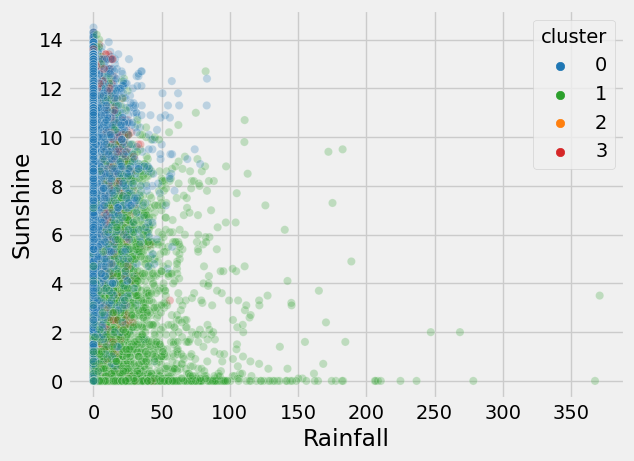

In [30]:
# Cluster visualisation

sns.scatterplot(data, 
                x='Rainfall',
                y='Sunshine', 
                hue='cluster',
                alpha=0.25,
                palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])


In [37]:

pd.crosstab(data.cluster, data.Location, margins=True)


Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,All
cluster,,,,,,,,,,,,,,,,,,,,,
0,975,274,555,2054,311,273,571,1763,2390,508,...,218,891,1159,104,678,882,266,233,1757,42842
1,12,1408,816,284,29,1771,1048,697,566,1108,...,26,89,911,77,1763,959,57,1173,434,35661
2,7,22,4,1,159,22,9,0,0,217,...,22,4,0,3,0,10,135,21,8,13949
3,2096,1312,1636,692,2429,962,1406,701,32,1585,...,2732,537,906,2635,558,702,2494,1556,791,49741
All,3090,3016,3011,3031,2928,3028,3034,3161,2988,3418,...,2998,1521,2976,2819,2999,2553,2952,2983,2990,142193
